<a href="https://colab.research.google.com/github/farrazrizky/Pemrograman_Python/blob/main/TUBES_LAB_SISKOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Repetition Code**

In [ ]:
# menggunakan kode Hamming 
num_parity_bits = 4

def hamming(n):
    r = []
    for i in range(n): r.append(pow(2, i))
    return r

# masukkan 0 ke posisi bit
def insert_zero(num, pos):
    mask = pow(2, pos - 1) - 1 
    t = num & mask
    num = (num >> (pos - 1)) << pos
    num = num + t
    return num

# buat posisi bit terlebih dahulu, atur bit paritas ke 0
def setup(data):    
    bits = hamming(num_parity_bits)
    for b in bits:
        data = insert_zero(data, b)   
    return data
    
# temukan posisi bit yang bitnya diatur
def pos(num):
    r = []
    for i in range(1,num.bit_length()+1):
        if num & 1: r.append(i)
        num = num >> 1        
    return r

# XOR daftar nomor
def xor(poslist):
    r = 0
    for n in poslist:
        r = r ^ n
    return r

# atur bit paritas, berikan bit yang akan disetel, dan blok yang akan disetel
def set_parity(bits, block):
    for i, n in enumerate(hamming(num_parity_bits)):
        if bits & pow(2, i): 
            block = block | pow(2, n-1)
    return block

# hapus bit pada posisi tertentu
def remove_bit(num, pos):
    mask = pow(2, pos - 1) - 1
    t = num & mask
    num = (num >> pos) << (pos - 1)
    return num + t

# membalik sedikit data pada posisi tertentu
def flip(pos, data):
    return data ^ (1 << pos - 1)

# encode 
def encode(d):
    data = setup(d)
    positions = pos(data)
    bits = xor(positions)
    encoded = set_parity(bits, data)
    return encoded

# decode 
def decode(e):
    c = xor(pos(e))
    if c: e = flip(c, e) # Balikkan sedikit jika ada kesalahan
    bits = hamming(num_parity_bits)
    bits.reverse()
    for b in bits:
        e = remove_bit(e, b)
    return e


def p(text, num): print(text, bin(num))

original = 0b1001101
p("original:", original)

encoded = encode(original)
p("encoded :", encoded)

decoded = decode(encoded)
p("decoded :", decoded)

print()

# Balikkan sedikit pada posisi 8 untuk membuat kesalahan
err = flip(8, encoded)
p("original:", original)
p("encoded :", encoded)
p("flipped :", err)

decoded = decode(err)
p("decoded :", decoded)

original: 0b1001101
encoded : 0b10011100101
decoded : 0b1001101

original: 0b1001101
encoded : 0b10011100101
flipped : 0b10001100101
decoded : 0b1001101


## **QPSK**

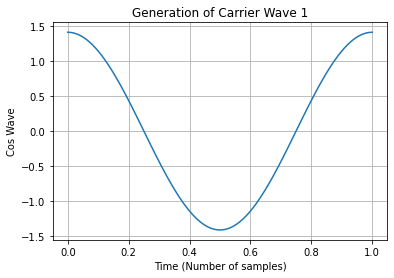

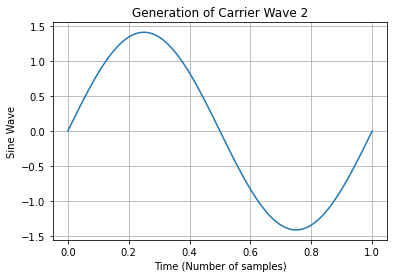

0.6358955739855878
0.5351106111873789
0.6278159008156158
0.7923443812670576
0.7620316461121845
0.5076934859056716
0.9565522201991687
0.7411542963128017
0.9694272872661192
0.008350479999660654
0.6252807088684804
0.39868628170923515
0.3725652254120704
0.9584328250218677
0.8565059088463954
0.7719632707069352


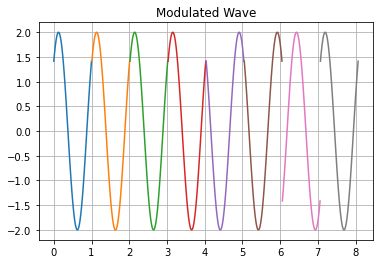

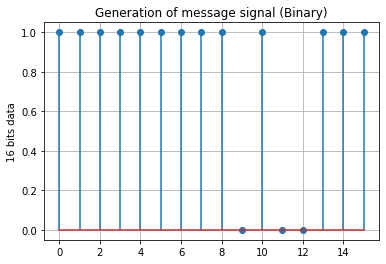

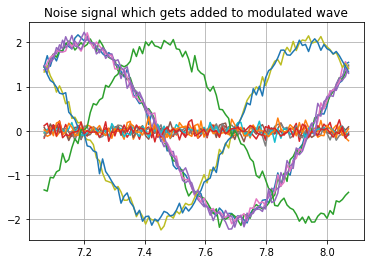

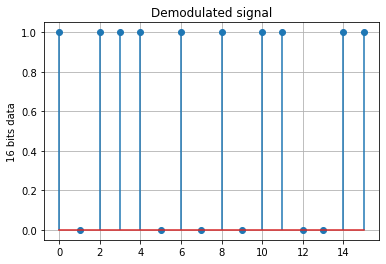

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import random

t = np.linspace(0,1,100)  # Time
tb = 1;
fc = 1;    # carrier frequency

c1 = sqrt(2/tb)*np.cos(2*np.pi*fc*t)  # carrier frequency cosine wave
c2 = sqrt(2/tb)*np.sin(2*np.pi*fc*t)  # carrier frequency sine wave

fig, ax1 = plt.subplots()
ax1.plot(t, c1)
ax1.grid()
ax1.set_xlabel('Time (Number of samples)')
ax1.set_ylabel('Cos Wave')
plt.title('Generation of Carrier Wave 1')
plt.show()

fig, ax2 = plt.subplots()
ax2.plot(t, c2)
ax2.grid()
ax2.set_xlabel('Time (Number of samples)')
ax2.set_ylabel('Sine Wave')
plt.title('Generation of Carrier Wave 2')
plt.show()


m = []
t1 = 0;
t2 = tb;
for i in range(16):
    m.append(random.uniform(0,1))   # message signal (binary)
    print(m[i])

#Modulation

odd_sig = np.zeros((16,100))
even_sig = np.zeros((16,100))
fig, ax4 = plt.subplots()
for i in range(0,15,2):
    t = np.linspace(t1,t2,100)
    if (m[i]>0.5):
        m[i] = 1
        m_s = np.ones((1,len(t)))
    else:
        m[i] = 0
        m_s = (-1)*np.ones((1,len(t)))

    odd_sig[i,:] = c1*m_s

    if (m[i+1]>0.5):
        m[i+1] = 1
        m_s = np.ones((1,len(t)))
    else:
        m[i+1] = 0
        m_s = (-1)*np.ones((1,len(t)))

    even_sig[i,:] = c2*m_s

    qpsk = odd_sig + even_sig   # modulated wave = oddbits + evenbits

    ax4.plot(t,qpsk[i,:])
    t1 = t1 + (tb+0.01)
    t2 = t2 + (tb+0.01)

ax4.grid()
plt.title('Modulated Wave')
plt.show()


fig, ax3 = plt.subplots()
ax3.stem(range(16), m,use_line_collection=True)
ax3.grid()
ax3.set_ylabel('16 bits data')
plt.title('Generation of message signal (Binary)')
plt.show()

#Noise-Demodulation

noise = np.random.normal(0, 0.1, [16,100]) # noise using random function

channel = noise + qpsk    # adding noise to qpsk modulated wave

fig, ax5 = plt.subplots()
for i in range(0,15,1):
       ax5.plot(t,channel[i,:])

ax5.grid()
plt.title('Noise signal which gets added to modulated wave')
plt.show()

## demodulation

t1 = 0
t2 = tb

demod = np.zeros((16,1))    # demodulated signal  (demodulation of noise + qpsk modulated wave)

for i in range(0,15,1):
    t = np.linspace(t1,t2,100)
    x1 = sum(c1*channel[i,:])
    x2 = sum(c2*channel[i,:])

    if(x1>0 and x2>0):
        demod[i] = 1
        demod[i+1] = 1
    elif (x1>0 and x2<0):
        demod[i] = 1
        demod[i+1] = 0
    elif (x1<0 and x2<0):
        demod[i] = 0
        demod[i+1] = 0
    elif (x1<0 and x2>0):
        demod[i] = 0
        demod[i+1] = 1

    t1 = t1 + (tb+0.01)
    t2 = t2 + (tb+0.01)


fig, ax6 = plt.subplots()
ax6.stem(range(16), demod,use_line_collection=True)
ax6.grid()
ax6.set_ylabel('16 bits data')
plt.title('Demodulated signal')
plt.show()

# **BPSK**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:198: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


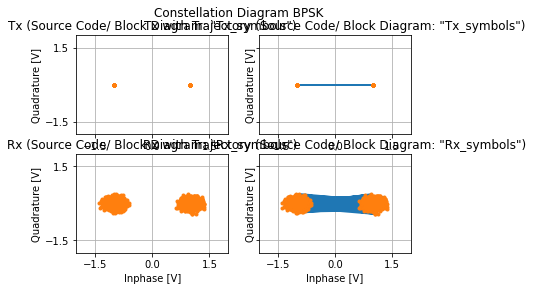

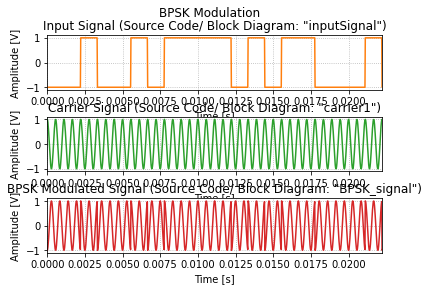

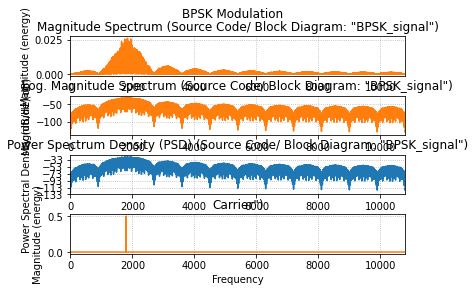

In [ ]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy as scy
import threading,time
import multiprocessing
import sys
import cmath

from scipy.fftpack import fft
from numpy import pi
from numpy import sqrt
from numpy import sin
from numpy import cos
from numpy import zeros
from numpy import r_
from  scipy.io.wavfile import read as wavread

# Digunakan untuk pembuatan simbol. Mengembalikan angka desimal dari input 1 bit
def GetBpskSymbol(bit1:bool):
    if(~bit1):
        return 0
    elif(bit1):
        return 1
    else:
        return -1

    # Memetakan simbol yang diberikan ke sinyal yang kompleks. Secara opsional, kebisingan dan offset fase dapat ditambahkan.
def BpskSymbolMapper(symbols:int,amplitude,noise1=0, noise2=0,  phaseOffset = 0):
    if(symbols == 0):
        return amplitude*(cos(np.deg2rad(0) + phaseOffset)) + (noise1 + 1j*noise2)
    elif(symbols == 1):
        return amplitude*(cos(np.deg2rad(180) + phaseOffset)) + (noise1 + 1j*noise2)
    else:
        return complex(0)

#-------------------------------------#
#---------- Configuration ------------#
#-------------------------------------#
fs = 44100                  # sampling rate
baud = 900                  # symbol rate
Nbits = 4000                # number of bits
f0 = 1800                   # carrier Frequency
Ns = int(fs/baud)           # number of Samples per Symbol
N = Nbits * Ns              # Total Number of Samples
t = r_[0.0:N]/fs            # time points
f = r_[0:N/2.0]/N*fs        # Frequency Points

# Batas untuk representasi sinyal domain waktu untuk visibilitas yang lebih baik. 
symbolsToShow = 20
timeDomainVisibleLimit = np.minimum(Nbits/baud,symbolsToShow/baud)     

# Batas untuk representasi sinyal domain frekuensi untuk visibilitas yang lebih baik.
sideLobesToShow = 9
sideLobeWidthSpectrum = baud                                       
lowerLimit = np.maximum(0,f0-sideLobeWidthSpectrum*(1 + sideLobesToShow))
upperLimit = f0 + sideLobeWidthSpectrum*(1 + sideLobesToShow)

carrier1 = cos(2*pi*f0*t)

#----------------------------#
#---------- BPSK ------------#
#----------------------------#

# Modulator Input
inputBits = np.random.randn(Nbits,1) > 0

# Digital-to-Analog Conversion
inputSignal = (np.tile(inputBits*2-1,(1,Ns))).ravel()
dataSymbols = np.array([[GetBpskSymbol(inputBits[x])] for x in range(0,inputBits.size)])

#Multiplicator / mixxer
BPSK_signal = inputSignal*( carrier1)# + intermodulation1+ intermodulation2)

#---------- Preperation BPSK Constellation Diagram ------------#

amplitude = 1

#Menghasilkan kebisingan. Dua sumber untuk kebisingan yang tidak terkait.
noiseStandardDeviation = 0.12
noise1 = np.random.normal(0,noiseStandardDeviation,dataSymbols.size) 
noise2 = np.random.normal(0,noiseStandardDeviation,dataSymbols.size) 

#Transmitted and received symbols. Rx symbols are generated under the presence of noise
Tx_symbols = np.array([[BpskSymbolMapper(dataSymbols[x],
                                         amplitude,
                                         phaseOffset = np.deg2rad(0)
                                         )] for x in range(0,dataSymbols.size)])
Rx_symbols = np.array([[BpskSymbolMapper(dataSymbols[x],
                                         amplitude,
                                        noise1 = noise1[x],
                                        noise2 = noise2[x],
                                        phaseOffset = np.deg2rad(0)
                                        )] for x in range(0,dataSymbols.size)])

#---------- Plot of BPSK Constellation Diagram ------------#
fig, axis= plt.subplots(2,2,sharey='row')
fig.suptitle('Constellation Diagram BPSK', fontsize=12)

axis[0,0].plot(Tx_symbols.real, Tx_symbols.imag,'.', color='C1')
axis[0,0].set_title('Tx (Source Code/ Block Diagram: "Tx_symbols")')
axis[0,0].set_xlabel('Inphase [V]')
axis[0,0].set_ylabel('Quadrature [V]')
axis[0,0].set_xlim(-2,2)
axis[0,0].set_xticks([-1.5,0,1.5])
axis[0,0].set_yticks([-1.5,1.5])
axis[0,0].set_ylim(-2,2)
axis[0,0].grid(True)

axis[0,1].plot(Tx_symbols.real, Tx_symbols.imag,'-',Tx_symbols.real, Tx_symbols.imag,'.')
axis[0,1].set_title('Tx with Trajectory (Source Code/ Block Diagram: "Tx_symbols")')
axis[0,1].set_xlabel('Inphase [V]')
axis[0,1].set_ylabel('Quadrature [V]')
axis[0,1].set_xlim(-2,2)
axis[0,1].set_xticks([-1.5,0,1.5])
axis[0,1].set_yticks([-1.5,1.5])
axis[0,1].set_ylim(-2,2)
axis[0,1].grid(True)

axis[1,0].plot(Rx_symbols.real, Rx_symbols.imag,'.', color='C1')
axis[1,0].set_title('Rx (Source Code/ Block Diagram: "Rx_symbols")')
axis[1,0].set_xlabel('Inphase [V]')
axis[1,0].set_ylabel('Quadrature [V]')
axis[1,0].set_xlim(-2,2)
axis[1,0].set_xticks([-1.5,0,1.5])
axis[1,0].set_yticks([-1.5,1.5])
axis[1,0].set_ylim(-2,2)
axis[1,0].grid(True)

axis[1,1].plot(Rx_symbols.real, Rx_symbols.imag,'-',Rx_symbols.real, Rx_symbols.imag,'.')
axis[1,1].set_title('Rx with Trajectory (Source Code/ Block Diagram: "Rx_symbols")')
axis[1,1].set_xlabel('Inphase [V]')
axis[1,1].set_ylabel('Quadrature [V]')
axis[1,1].set_xlim(-2,2)
axis[1,1].set_xticks([-1.5,0,1.5])
axis[1,1].set_yticks([-1.5,1.5])
axis[1,1].set_ylim(-2,2)
axis[1,1].grid(True)

#---------- Plot of BPSK ------------#
fig, axis = plt.subplots(3, 1)
fig.suptitle('BPSK Modulation', fontsize=12)

axis[0].plot(t, inputSignal, color='C1')
axis[0].set_title('Input Signal (Source Code/ Block Diagram: "inputSignal")')
axis[0].set_xlabel('Time [s]')
axis[0].set_xlim(0,timeDomainVisibleLimit)
axis[0].set_ylabel('Amplitude [V]')
axis[0].grid(linestyle='dotted')

axis[1].plot(t, carrier1, color='C2')
axis[1].set_title('Carrier Signal (Source Code/ Block Diagram: "carrier1")')
axis[1].set_xlabel('Time [s]')
axis[1].set_xlim(0,timeDomainVisibleLimit)
axis[1].set_ylabel('Amplitude [V]')
axis[1].grid(linestyle='dotted')

axis[2].plot(t,BPSK_signal, color='C3')
axis[2].set_title('BPSK Modulated Signal (Source Code/ Block Diagram: "BPSK_signal")')
axis[2].set_xlabel('Time [s]')
axis[2].set_xlim(0,timeDomainVisibleLimit)
axis[2].set_ylabel('Amplitude [V]')
axis[2].grid(linestyle='dotted')

plt.subplots_adjust(hspace=0.5)

#---------- Plot of Modulated Signal and Spectrum ------------#
fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(4, 1, figure=fig)
fig.suptitle('BPSK Modulation', fontsize=12)
ax = fig.add_subplot(gs[0, :])
 
ax1 = fig.add_subplot(gs[0])
ax1.set_title('Magnitude Spectrum (Source Code/ Block Diagram: "BPSK_signal")');
ax1.magnitude_spectrum(BPSK_signal, Fs=fs, color='C1')
ax1.set_xlim(lowerLimit,upperLimit)
ax1.grid(linestyle='dotted')

ax2 = fig.add_subplot(gs[1])
ax2.set_title('Log. Magnitude Spectrum (Source Code/ Block Diagram: "BPSK_signal")')
ax2.magnitude_spectrum(BPSK_signal, Fs=fs, scale='dB', color='C1')
ax2.set_xlim(lowerLimit,upperLimit)
ax2.grid(linestyle='dotted')

ax3 = fig.add_subplot(gs[2])
ax3.set_title('Power Spectrum Density (PSD) (Source Code/ Block Diagram: "BPSK_signal")')
ax3.psd(BPSK_signal,NFFT=len(t),Fs=fs)
ax3.set_xlim(lowerLimit,upperLimit)
ax3.grid(linestyle='dotted')

ax4 = fig.add_subplot(gs[3])
ax4.set_title('Carrier")');
ax4.magnitude_spectrum(carrier1, Fs=fs, color='C1')
ax4.set_xlim(lowerLimit,upperLimit)
ax4.grid(linestyle='dotted')

plt.subplots_adjust(hspace=0.5)
plt.show()

# **AWGN**

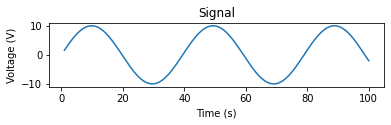

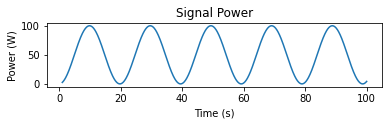

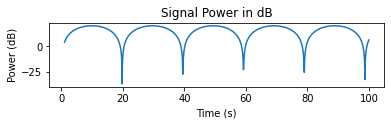

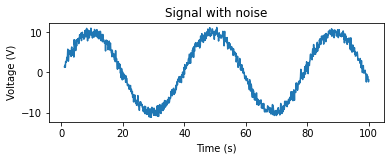

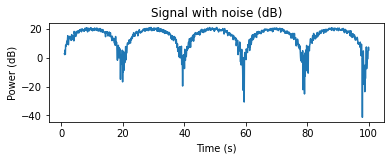

In [ ]:
# Signal Generation
# matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(1, 100, 1000)
x_volts = 10*np.sin(t/(2*np.pi))
plt.subplot(3,1,1)
plt.plot(t, x_volts)
plt.title('Signal')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

x_watts = x_volts ** 2
plt.subplot(3,1,2)
plt.plot(t, x_watts)
plt.title('Signal Power')
plt.ylabel('Power (W)')
plt.xlabel('Time (s)')
plt.show()

x_db = 10 * np.log10(x_watts)
plt.subplot(3,1,3)
plt.plot(t, x_db)
plt.title('Signal Power in dB')
plt.ylabel('Power (dB)')
plt.xlabel('Time (s)')
plt.show()

# Adding noise using target SNR

# Set a target SNR
target_snr_db = 20
# Calculate signal power and convert to dB 
sig_avg_watts = np.mean(x_watts)
sig_avg_db = 10 * np.log10(sig_avg_watts)
# Calculate noise according to [2] then convert to watts
noise_avg_db = sig_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
# Noise up the original signal
y_volts = x_volts + noise_volts

# Plot signal with noise
plt.subplot(2,1,1)
plt.plot(t, y_volts)
plt.title('Signal with noise')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()
# Plot in dB
y_watts = y_volts ** 2
y_db = 10 * np.log10(y_watts)
plt.subplot(2,1,2)
plt.plot(t, 10* np.log10(y_volts**2))
plt.title('Signal with noise (dB)')
plt.ylabel('Power (dB)')
plt.xlabel('Time (s)')
plt.show()

# **BER**

EbNodB: 0
Error bits: 392595
Error probability: 0.078519
EbNodB: 1
Error bits: 281414
Error probability: 0.0562828
EbNodB: 2
Error bits: 188340
Error probability: 0.037668
EbNodB: 3
Error bits: 115329
Error probability: 0.0230658
EbNodB: 4
Error bits: 62653
Error probability: 0.0125306
EbNodB: 5
Error bits: 29916
Error probability: 0.0059832
EbNodB: 6
Error bits: 12039
Error probability: 0.0024078
EbNodB: 7
Error bits: 3846
Error probability: 0.0007692
EbNodB: 8
Error bits: 1030
Error probability: 0.000206
EbNodB: 9
Error bits: 149
Error probability: 2.98e-05
EbNodB: 10
Error bits: 20
Error probability: 4e-06


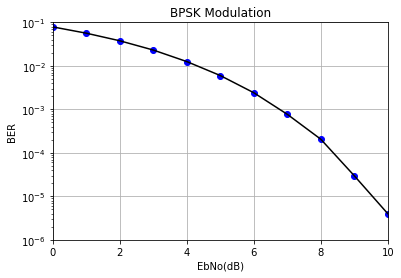

In [ ]:
from numpy import sqrt
from numpy.random import rand, randn
import matplotlib.pyplot as plt
  
N = 5000000
EbNodB_range = range(0,11)
itr = len(EbNodB_range)
ber = [None]*itr

for n in range (0, itr): 
 
    EbNodB = EbNodB_range[n]   
    EbNo=10.0**(EbNodB/10.0)
    x = 2 * (rand(N) >= 0.5) - 1
    noise_std = 1/sqrt(2*EbNo)
    y = x + noise_std * randn(N)
    y_d = 2 * (y >= 0) - 1
    errors = (x != y_d).sum()
    ber[n] = 1.0 * errors / N
    
    print("EbNodB:", EbNodB)
    print("Error bits:", errors)
    print("Error probability:", ber[n]) 
        
plt.plot(EbNodB_range, ber, 'bo', EbNodB_range, ber, 'k')
plt.axis([0, 10, 1e-6, 0.1])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BER')
plt.grid(True)
plt.title('BPSK Modulation')
plt.show()